In [ ]:
## import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# **Loading and reading of data.**

In [ ]:
## loading the Drivers dataset

data = pd.read_csv("Drivers_Data.csv")

print(data)


    Driver_ID               Name  Age           City  Experience_Years  \
0         101      William Black   56  San Francisco                15   
1         102      Holly Sherman   39    Los Angeles                19   
2         103       Crystal Cook   57        Chicago                 9   
3         104     Tiffany Wright   58  San Francisco                19   
4         105       Jeffrey King   49    Los Angeles                 4   
..        ...                ...  ...            ...               ...   
95        196       Stephen Ryan   54          Miami                 9   
96        197    Michael Shields   49    Los Angeles                 4   
97        198  Taylor Stephenson   58        Chicago                 3   
98        199    Monica Copeland   37  San Francisco                10   
99        200         Amy Guzman   36       New York                20   

    Average_Rating Active_Status  
0              4.8        Active  
1              4.3        Active  
2     

Step 2: Data pre-processing

In [ ]:
## checking duplicates in the data

print(data.duplicated().sum())
print('-------------')
## checking for missing values in the dataset

print(data.isnull().sum())
print('---------------')
## checking if the dataset is of correct datatype

print(data.dtypes)
print('---------------')
## viewing information about the data

data.info()
print('---------------')
### viewing shape of the dataset

print(data.shape)

0
-------------
Driver_ID           0
Name                0
Age                 0
City                0
Experience_Years    0
Average_Rating      0
Active_Status       0
dtype: int64
---------------
Driver_ID             int64
Name                 object
Age                   int64
City                 object
Experience_Years      int64
Average_Rating      float64
Active_Status        object
dtype: object
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         100 non-null    int64  
 1   Name              100 non-null    object 
 2   Age               100 non-null    int64  
 3   City              100 non-null    object 
 4   Experience_Years  100 non-null    int64  
 5   Average_Rating    100 non-null    float64
 6   Active_Status     100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory us

***Intepretations***

There are no duplicates in the dataset

There are no missing values in the dataset

The data in the dataset are of correct data types

The dataset has 100 rows and 7 columns

# **Step 3 : EDA**

In [ ]:
## viewing the summary statistic of the dataset

data.describe()


,Driver_ID,Age,Experience_Years,Average_Rating
count,100.000000,100.000000,100.000000,100.000000
mean,150.500000,44.520000,11.620000,4.576000
std,29.011492,10.908694,5.991206,0.299535
min,101.000000,25.000000,1.000000,4.000000
25%,125.750000,35.750000,7.000000,4.300000
50%,150.500000,44.500000,11.500000,4.600000
75%,175.250000,55.250000,17.000000,4.800000
max,200.000000,60.000000,20.000000,5.000000


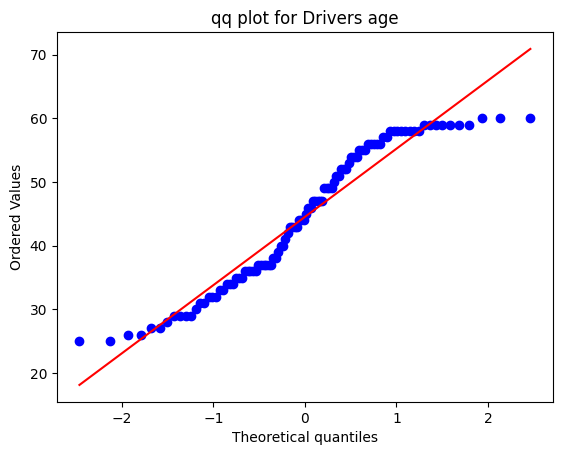

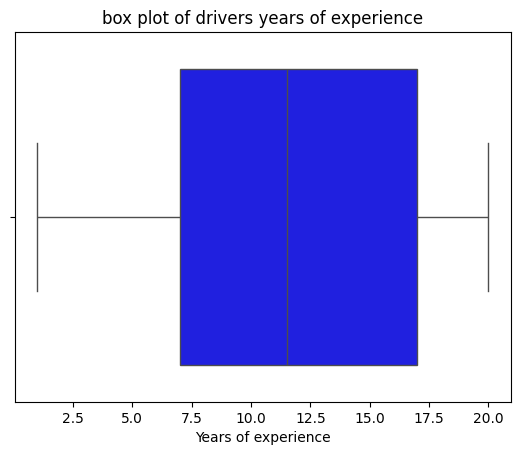

-0.28576019602145536
-1.1376272446495024


In [ ]:
## checking for normality of the data
## qq plot for Age column

stats.probplot(data['Age'], dist= 'norm', plot = plt)
plt.title('qq plot for Drivers age')
plt.show()

## boxplot for experience years column

sns.boxplot(x= data['Experience_Years'],color= 'blue')
plt.title('box plot of drivers years of experience')
plt.xlabel('Years of experience')
plt.show()


##calculating kurtosis and skewness of average rating

from scipy.stats import kurtosis
from scipy.stats import skew

rating_skew= data['Average_Rating'].skew()
print(rating_skew)

rating_kurt = data['Average_Rating'].kurtosis()
print(rating_kurt)



***Intepretation***

1.qq plot


the dotted points are not aligned on the diagonal line.the qq plot of driver's age shows that the age data is not normally distributed

2. Box plot

the whisker on the left of the boxplot is longer compared to the whisker on the right. this shows that the data is skewed to the left. This indicates a higher number of drivers with fewer years of experience.

The box plot also shows that there are no outliers in the years of experience data


3.Kurtosis and Skewness

The skewness value of Average Rating is negative.Therefore the Average Rating data is skewed to the left.

The kurtosis value of Average Rating is also negative. This shows that the Average Rating data has a shorted tail, hence it is Platykurtic

# **Data Visualizations**

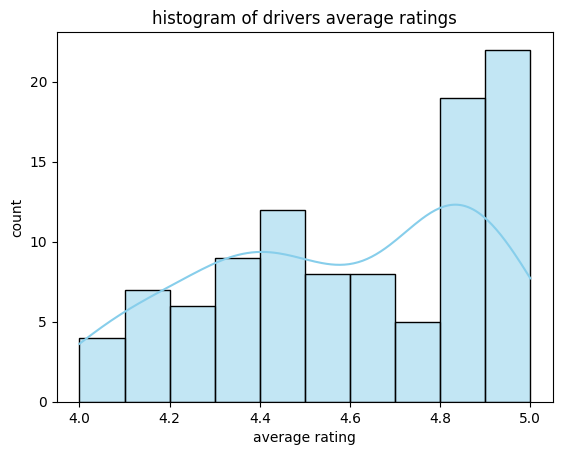

In [ ]:

## plotting a histogram and kde of average rating

sns.histplot(data['Average_Rating'], kde =True, bins = 10, color = 'skyblue')
plt.title('histogram of drivers average ratings')
plt.xlabel('average rating')
plt.ylabel('count')
plt.show()

***Intepretation***

The histogram is not symetric and the KDE is not bell shaped hence indicating that the number is not normally distributed.

we can also see from the histogram that many drivers are rated between 4.8 and 5.0


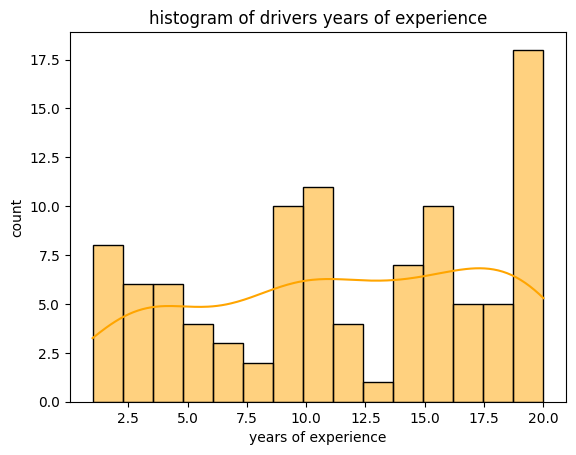

In [ ]:
## plotting a histogram and kde of experience years

sns.histplot(data['Experience_Years'], kde =True, bins = 15, color = 'orange')
plt.title('histogram of drivers years of experience')
plt.xlabel('years of experience')
plt.ylabel('count')
plt.show()

***Intepretation***

The histogram show that the drivers years of experience is distributed evenly with many drivers having between 18 to 20 years of experience and a few drivers having between 12.5 to 13 years of experience.

# **Patterns and trends**

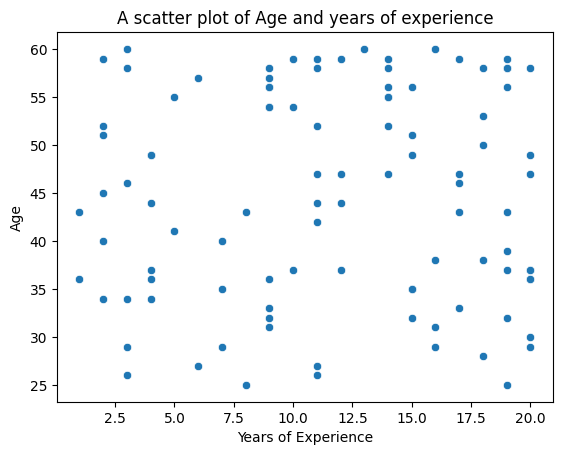

In [ ]:
### A scatter plot of years of experience and Age
sns.scatterplot(x= data['Experience_Years'],y= data['Age'], data = data)
plt.title('A scatter plot of Age and years of experience')
plt.xlabel('Years of Experience')
plt.ylabel('Age')
plt.show()


# *Interpretation*

In the scatter plot, we are unable to tell the relationship between years of experience and age.

This suggests no direct linear correlation between these two variables.

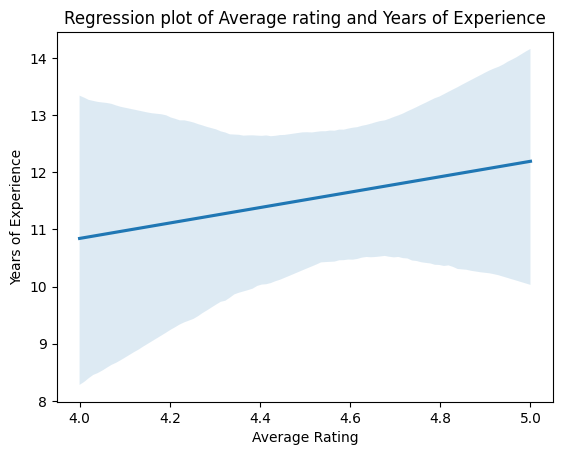

In [ ]:
## A Regression plot of Average rating and years of experience
sns.regplot(x= data['Average_Rating'],y=data['Experience_Years'],data = data,scatter = False)
plt.title('Regression plot of Average rating and Years of Experience')
plt.xlabel('Average Rating')
plt.ylabel('Years of Experience')
plt.show()

In [ ]:
## correlation of the dataset

## Extracting data of numerical values only

numerical_columns = data.select_dtypes(include=['int64','float64'])
print(numerical_columns)

## correlation matrix
corr= numerical_columns.corr()
print('correlation matrix :')
print(corr)

    Driver_ID  Age  Experience_Years  Average_Rating
0         101   56                15             4.8
1         102   39                19             4.3
2         103   57                 9             4.5
3         104   58                19             4.4
4         105   49                 4             4.4
..        ...  ...               ...             ...
95        196   54                 9             4.8
96        197   49                 4             4.4
97        198   58                 3             4.8
98        199   37                10             4.1
99        200   36                20             4.3

[100 rows x 4 columns]
correlation matrix :
                  Driver_ID       Age  Experience_Years  Average_Rating
Driver_ID          1.000000  0.001053          0.134592       -0.003603
Age                0.001053  1.000000          0.026701        0.253328
Experience_Years   0.134592  0.026701          1.000000        0.067476
Average_Rating    -0.003603  0.

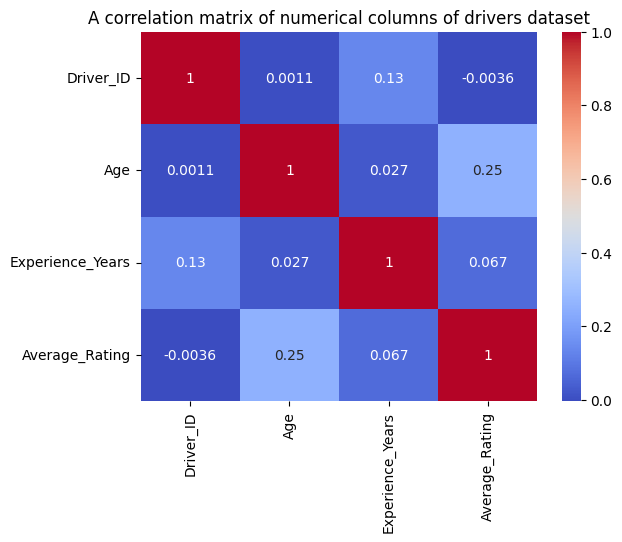

In [ ]:
## plotting a heatmap of numerical columns

sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('A correlation matrix of numerical columns of drivers dataset')
plt.show()

***Intepretation***

The heatmap indicates that there is low correlation between the variables of the drivers dataset.

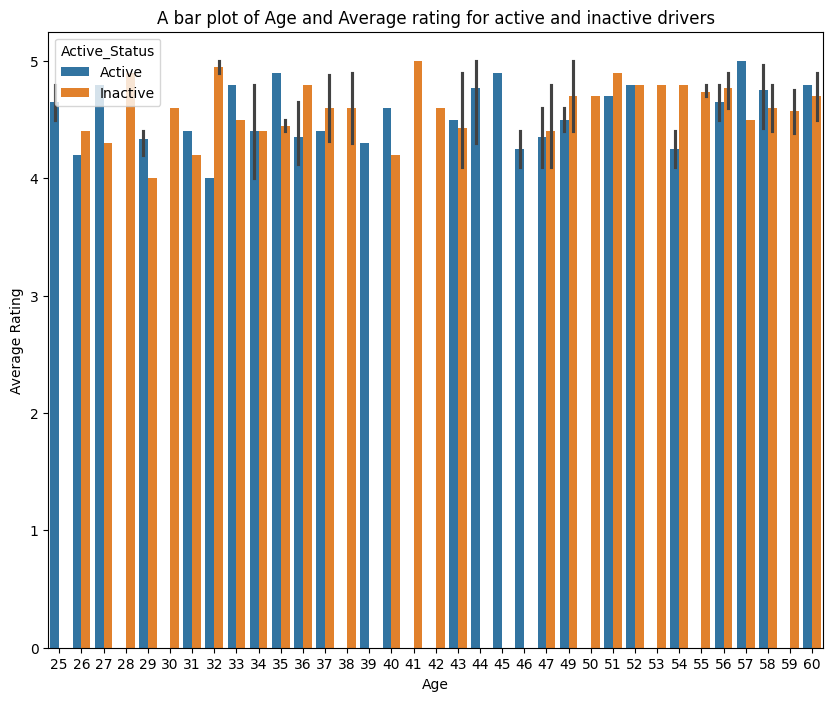

In [ ]:
### A barplot of age and average rating for active and inactive drivers
plt.figure(figsize = (10,8))
sns.barplot(data = data, x = data['Age'],y = data['Average_Rating'], hue = 'Active_Status')
plt.title('A bar plot of Age and Average rating for active and inactive drivers')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.show()

Active_Status
Inactive    55
Active      45
Name: count, dtype: int64


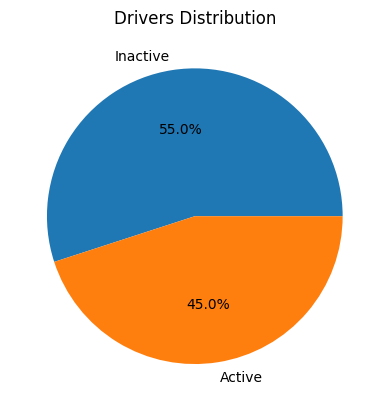

In [ ]:
## a pie chart of total number of active and inactive drivers

drivers = data['Active_Status'].value_counts()
print(drivers)

plt.pie(drivers, labels = drivers.index, autopct = '%1.1f%%')
plt.title("Drivers Distribution")
plt.show()

***Intepretation***

The pie chart shows that 55% of the drivers are active while 45% of the drivers are inactive

# **A/B Testing**


# **Hypothesis Test:**

Null hypothesis:  Drivers of age 40 and above have a high Average rating compared to drivers below 40 years


Alternative Hypothesis:  Drivers of age 40 and above do not have high average rating compared to drivers below 40 years



In [ ]:
## data slicing
# drivers with 40 years and above
df1 = data[data['Age']>= 40]['Average_Rating']
print(df1)

# drivers below 40 years
df2 = data[data['Age']< 40]['Average_Rating']
print(df2)


### T- test

t_stat, p_value = stats.ttest_ind(df1,df2)

print(f'T-statistic: {t_stat}, p - value : {p_value}')


## Hypothesis testing
## Interpreting the results
alpha = 0.05

if p_value < alpha:
  print("Reject the Null hypothesis: Drivers of age 40 and above do not have a high Average rating compared to drivers below 40 years")
else:
  print("Fail to reject the Null hypothesis.")

0     4.8
2     4.5
3     4.4
4     4.4
6     5.0
     ... 
92    4.3
93    4.8
95    4.8
96    4.4
97    4.8
Name: Average_Rating, Length: 61, dtype: float64
1     4.3
5     4.3
7     4.9
8     4.5
12    4.4
14    4.4
15    4.9
16    4.8
19    4.2
20    4.9
21    5.0
23    4.5
27    4.4
31    4.8
35    4.0
42    4.1
46    4.3
51    4.2
54    4.0
55    4.3
56    4.2
58    4.4
62    4.0
63    4.5
64    4.4
66    4.8
67    4.8
69    5.0
71    4.8
77    4.6
80    4.9
82    4.8
83    4.4
84    4.8
85    4.8
89    4.2
94    4.4
98    4.1
99    4.3
Name: Average_Rating, dtype: float64
T-statistic: 2.1345562966238627, p - value : 0.03529170039455208
Reject the Null hypothesis: Drivers of age 40 and above do not have a high Average rating compared to drivers below 40 years
